### IR Wavefunction

$$
\newcommand{\ket}[1]{\vert{#1}\rangle}\\
\newcommand{\bra}[1]{\langle{#1}\vert}\\
\ket{\text{IR}} = \ket{\hat n_{k_{-2}} = \hat n_{k_{-3}} = 2} \otimes \frac{1}{2}\bigg[ \ket{\uparrow^d}\frac{1}{\sqrt 2}\left(\ket{k_1 \downarrow} + \ket{k_{-1} \downarrow}\right) - \ket{\downarrow^d}\frac{1}{\sqrt 2}\left(\ket{k_1 \uparrow} + \ket{k_{-1} \uparrow}\right) + \ket{2^d}\ket{0} - \ket{0^d}\ket{k_1 \uparrow, k_1 \downarrow,k_{-1} \uparrow,k_{-1} \downarrow}\bigg] \otimes  \ket{\hat n_{k_{2}} = \hat n_{k_{3} } = 0} = \ket{1111}\ket{0000}\\
=\frac{1}{2}\ket{0000} \otimes \left[\ket{10}\ket{0101} - \ket{01}\ket{1010} + \ket{11}\ket{0000} - \ket{00}\ket{1111}\right] \otimes \ket{1111}\\
=\frac{1}{2}\ket{0000} \otimes \left[\ket{01} \underbrace{\ket{10}}_\text{imp}\ket{01} - \ket{10}\underbrace{\ket{01}}_\text{imp}\ket{10} + \ket{00}\underbrace{\ket{11}}_\text{imp}\ket{00} - \ket{11}\underbrace{\ket{00}}_\text{imp}\ket{11}\right] \otimes \ket{1111}\\
U^\dagger_{k_+, k_-} = \frac{1}{2}\left[1 + \eta_{k_- \uparrow} + \eta^\dagger_{k_+ \uparrow} + \eta_{k_- \downarrow} + \eta^\dagger_{k_+ \downarrow}\right] \\
 \\
\eta_{k_+\beta}^\dagger = V \left[\lambda_2 \hat n_{d\overline\beta} + \lambda_1 \left( 1 - \hat n_{d \overline \beta} \right)  \right]c^\dagger_{q\beta}c_{d\beta} + \lambda_3 \sum_{k} \left\{ \frac{J}{2}\left( S_d^z \beta c^\dagger_{q\beta}c_{k\beta} + c^\dagger_{d \overline \beta}c_{d\beta}c^\dagger_{q\beta}c_{k \overline \beta}\right) + \frac{K}{2}\left( C^z_d c^\dagger_{q\beta}c_{k\beta} + c^\dagger_{q\beta}c^\dagger_{k \overline \beta}c_{d \overline \beta}c_{d\beta} \right) \right\}\\
\eta_{k_-\beta} = V^* \left[\lambda_1 \hat n_{d \overline \beta} + \lambda_2 \left( 1 - \hat n_{d \overline \beta} \right)  \right]c^\dagger_{d\beta}c_{q\beta} + \lambda_3 \sum_{k} \left\{ \frac{J}{2}\left( S_d^z \beta c^\dagger_{k\beta}c_{q\beta} + c^\dagger_{d\beta}c_{d \overline \beta}c^\dagger_{k \overline \beta}c_{q\beta}\right)+ \frac{K}{2}\left( C^z_d c^\dagger_{k\beta}c_{q\beta} + c^\dagger_{d\beta}c^\dagger_{d \overline \beta}c_{k \overline \beta}c_{q\beta} \right) \right\} \\
\lambda_1 = \frac{1}{\omega - \frac{1}{2}D + \epsilon_d + \frac{1}{2}K}, \lambda_2 = \frac{1}{\omega - \frac{1}{2}D - \epsilon_d + \frac{1}{2}J}, \lambda_3 = \frac{1}{\omega - \frac{1}{2}D + \frac{1}{4}\left(J + K\right)} 
$$

Half-way versions
$$
\frac{1}{2}\left[\underbrace{\ket{10}}_\text{imp}\ket{01} - \underbrace{\ket{01}}_\text{imp}\ket{10} + \underbrace{\ket{11}}_\text{imp}\ket{00} - \underbrace{\ket{00}}_\text{imp}\ket{11}\right] \otimes \ket{11}\\
U^\dagger_{k_+, k_-} = \frac{1}{2}\left[1 + \eta_{k_- \uparrow} + \eta_{k_- \downarrow}\right] \\
 \\
\eta_{k_-\beta} = V^* \left[\lambda_1 \hat n_{d \overline \beta} + \lambda_2 \left( 1 - \hat n_{d \overline \beta} \right)  \right]c^\dagger_{d\beta}c_{q\beta} + \lambda_3 \sum_{k} \left\{ \frac{J}{2}\left( S_d^z \beta c^\dagger_{k\beta}c_{q\beta} + c^\dagger_{d\beta}c_{d \overline \beta}c^\dagger_{k \overline \beta}c_{q\beta}\right)+ \frac{K}{2}\left( C^z_d c^\dagger_{k\beta}c_{q\beta} + c^\dagger_{d\beta}c^\dagger_{d \overline \beta}c_{k \overline \beta}c_{q\beta} \right) \right\} \\
\lambda_1 = \frac{1}{\omega - \frac{1}{2}D + \epsilon_d + \frac{1}{2}K}, \lambda_2 = \frac{1}{\omega - \frac{1}{2}D - \epsilon_d + \frac{1}{2}J}, \lambda_3 = \frac{1}{\omega - \frac{1}{2}D + \frac{1}{4}\left(J + K\right)} 
$$

In [32]:
!pip install qutip
from qutip import *
from math import *
import itertools
from itertools import product
import matplotlib
from matplotlib import pyplot as plt

import numpy as np

font = {'size'   : 17}

matplotlib.rc('font', **font)
matplotlib.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"]= 6, 4
#plt.rcParams['figure.dpi'] = 90
matplotlib.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True

idt = identity(2)
n = create(2) * destroy(2)

Cdz = 0.5 * (tensor(n, idt) +  tensor(idt, n) - 1)
# isospin z component

 

### Writing the impurity+cloud wavefunction

In [33]:
def get_cloud(csm, ccm, ins):
    d_up = tensor(basis(2,1), basis(2,0))
    d_dn = tensor(basis(2,0), basis(2,1))
    d_c_up = tensor(basis(2,1), basis(2,1))
    d_c_dn = tensor(basis(2,0), basis(2,0))
    cl_up = sum([tensor([basis(2,0), basis(2,0)]*(k) + [basis(2,1), basis(2,0)] + [basis(2,0), basis(2,0)]*(ins - k - 1)) for k in range(ins)]).unit()
    cl_dn = sum([tensor([basis(2,0), basis(2,0)]*(k) + [basis(2,0), basis(2,1)] + [basis(2,0), basis(2,0)]*(ins - k - 1)) for k in range(ins)]).unit()
    cl_c_dn = tensor([basis(2,0)]*2*ins)
    cl_c_up = 0
    for k,q in itertools.product(range(ins), range(ins)):
        base = [basis(2,0)]*2*ins
        base[2*k] = basis(2,1)
        base[2*q+1] = basis(2,1)
        cl_c_up += tensor(base)
    cl_c_up = cl_c_up.unit()
#     up = [1, 0, 0, 1, 0, 1]
#     down = [0, 1, 1, 0, 1, 0]
#     two = [1, 1, 0, 0, 0, 0]
#     zero = [0, 0, 1, 1, 1, 1]
#     cloudup = csm * tensor([basis(2,i) for i in up])
#     clouddown = csm * tensor([basis(2,i) for i in down])
#     cloudtwo = ccm * tensor([basis(2,i) for i in two])
#     cloudzero = ccm * tensor([basis(2,i) for i in zero])
#     psi_cloud = tensor(cloudup - clouddown + cloudtwo + cloudzero)
    psi_unnorm = csm * (tensor(d_up, cl_dn) - tensor(d_dn, cl_up)) + ccm * (tensor(d_c_up, cl_c_dn) + tensor(d_c_dn, cl_c_up))
    return psi_unnorm.unit()

## Creating the unitary

$ \eta^{\dagger/-} = \eta_1^{\dagger/-} + \eta_2^{\dagger/-} + \eta_3^{\dagger/-}$

### Create $c^\dagger_{q\beta}\otimes I_{\overline\beta}$ or $c_{q\beta}\otimes I_{\overline\beta}$

In [34]:
def cq(beta):
    return tensor([destroy(2), idt]) if beta == 1 else tensor([idt, destroy(2)])
    # place cq first if beta == up else place idt first

### Creating $\sum_k c_{k\beta}$

In [35]:
def sum_k_ck(beta, imp):
    # returns \sum_{k}c_{k\beta}
    
    ck = [destroy(2), idt] if beta == 1 else [idt, destroy(2)]
    # variable conj is supposed to tell me whether i require \sum_k c^\dagger_k or \sum_k c_k

    init = [imp] + [idt]*2*ins
    sum_over_k = 0
    for k in range(1, 2*ins+1, 2):
        sum_over_k += tensor([imp] + [idt]*(k-1) + ck + [idt]*(2*ins - k - 1))
#     sum_over_k = sum([tensor(init[:2*k] + ck + init[2*k+1:]) for k in range(2*ins)])

#     num = 2 * ins
#     for i in range(num):
#         # outer loop shifts the position of k over all cloud momenta

#         cur = 0
#         for j in range(num):
#             # inner loop creates the string for a particular k

#             if i != j: # if not the particular k, fill with idt
#                 cur = tensor(cur, idt, idt) if cur !=0 else tensor(idt, idt)
#             elif beta == 1: 
#                 # otherwise, check if spin is up or down, up goes first, down goes second
#                 cur = tensor(cur, ck, idt) if cur !=0 else tensor(ck, idt)
#             else: 
#                 cur = tensor(cur, idt, ck) if cur !=0 else tensor(idt, ck)
#         sum = cur if sum == 0 else sum + cur 
#     return sum
    return sum_over_k

### Creating first part of $\eta$

$$
V^* \left[\lambda_1 \hat n_{d \overline \beta} + \lambda_2 \left( 1 - \hat n_{d \overline \beta} \right)  \right]c^\dagger_{d\beta}c_{q\beta}
$$

In [36]:
def eta1(beta, args):
    c1, c2, c3, V, J, K = args
    
    c_q = cq(beta)
    # gets either c^\dagger_{q\beta}\otimes identity(q\ol\beta), or c_{q\beta}iden(q\ol\beta), depending on conj=\pm 1

    imp_part = [create(2), c2 * n + c1 * (1-n)] if beta == 1 else [c2 * n + c1 * (1-n), create(2)]
    # the full impurity part will be cimp \otimes idt(2) if beta is up, else idt(2) \otimes cimp,
    # because up part comes first

    cloud_imp_part = tensor(imp_part + [idt]*2*ins)
    # cloud electrons do not participate in this part of eta, hence just identities. 
    # ins is number of k states on one side of FS, *2 for spin 

    return V * tensor(cloud_imp_part, c_q)
    # if conj == 1 (if we are creating eta^dagger), then q is above the FS and eta_1 will be 
    # c^\dagger_q \otimes imp_part \otimes cloud_part, otherwise it will be imp_part \otimes cloud_part \otimes c_q,
    # because q will be below the FS

### Creating second part of $\eta$

$$
\lambda_3 \sum_{k} \frac{J}{2}\left( S_d^z \beta c^\dagger_{k\beta} + c^\dagger_{d\beta}c_{d \overline \beta}c^\dagger_{k \overline \beta}\right)c_{q\beta}
$$

In [37]:
def eta2(beta, args):
    c1, c2, c3, V, J, K = args
    
    betaSdz = beta * 0.5 * (tensor(n, idt) - tensor(idt, n))
    # gets \beta S_d^z
        
    c_q = cq(beta)
    # gets either c^\dagger_{q\beta}\otimes identity(q\ol\beta), or c_{q\beta}iden(q\ol\beta), depending on conj=\pm 1

    imp_part = -tensor(destroy(2), create(2)) if beta == -1 else tensor(create(2), destroy(2))
    
    k_beta_1 = sum_k_ck(beta, betaSdz)
    k_beta_bar_2 = sum_k_ck(-beta, imp_part)

    return (c3 / 2) * J * (tensor(k_beta_1.dag(), c_q) + tensor(k_beta_bar_2.dag(), c_q))

### Creating third part of $\eta$

$$
\lambda_3 \sum_{k} \frac{K}{2}\left( C^z_d c^\dagger_{k\beta} + c^\dagger_{d\beta}c^\dagger_{d \overline \beta}c_{k \overline \beta}\right)c_{q\beta} 
$$
Impurity part is
$$
\text{imp-part} = \beta * c^\dagger_{d \uparrow}c^\dagger_{d \downarrow}
$$

In [38]:
def eta3(beta, args):
    c1, c2, c3, V, J, K = args
               
    c_q = cq(beta)
    # gets either c^\dagger_{q\beta}\otimes identity(q\ol\beta), or c_{q\beta}iden(q\ol\beta), depending on conj=\pm 1

    imp_part = beta*tensor(create(2), create(2))
    
    k_beta_1 = sum_k_ck(beta, Cdz)
    k_beta_bar_2 = sum_k_ck(-beta, imp_part)

    return (c3 / 2) * K * (tensor(k_beta_1.dag(), c_q) + tensor(k_beta_bar_2, c_q))

In [39]:
def rev_one_step(psi, out, ins, args=[1]*4):

    Upsi = 0.5 * (psi)
    for beta in [1, -1]:   
        # beta = 1 is up, -1 is down

        iom1 = 0
        iom2 = 2*(out - 1)
        # iom1 == k states above the FS that are unchanged b4 & after this reverse RG step.
        # If conj == 1, that means I am working with a q that's empty, so iom1 will lose 2 states (q up, q down).
        # iom2 will lose two states if the electron being re-entangled is below FS, that is if conj == -1
        
        U, J, K, V, D, w = args
        
        c1 = 1/(w - D/2 - U/2 + K/2)
        c2 = 1/(w - D/2 + U/2 + J/2)
        c3 = 1/(w - D/2 + K/4 + J/4)

        args = (c1, c2, c3, V, J, K)
        
        Upsi += 0.5 * (eta1(beta, args) + eta2(beta, args) + eta3(beta, args))(psi)

    return Upsi

## Measures of Entanglement

### Mutual Information

$
\rho = \text{density matrix} = \ket{\Psi}\bra{\Psi}
$
,
$
I(A:B) = S_A + S_B - S_{AB}
$
,
$
S_X = \text{Tr}_X \left[{\rho}\right]
$

In [40]:
def mut_inf(psi, a, b):

    N = 2*(out + ins) + 2
    bit = [basis(2, 0), basis(2, 1)]
    gen = [[identity(2)]] * N
    for i in range(N):
        if gen.count(bit) >= N - 14:
                break
        if i not in (a,b):
            gen[i] = bit
            a = a - 1 if i < a else a
            b = b - 1 if i < b else b
            
    tot = gen.count(bit)
    if tot > 0:
        rho_ab = 0
        for term in tqdm(itertools.product(*gen), total=2**tot):
            # base = tensor(*term)
            bra = psi.dag() * tensor(*term)
            rho_ab += bra.dag() * bra
#         a = 0 if a <= N - 14 - 1 else a - (N - 14)
#         b = 0 if b <= N - 14 - 1 else b - (N - 14)
    else:
        rho_ab = psi * psi.dag()
    
    rho_ab = rho_ab.ptrace([a,b])
    rho_a = rho_ab.ptrace(int(a>b))
    rho_b = rho_ab.ptrace(int(a<b))


    S_a = entropy_vn(rho_a) 
    S_b = entropy_vn(rho_b)
    S_ab = entropy_vn(rho_ab)

    return S_a + S_b - S_ab

In [41]:
def mutI(psi, k, q):
    N = out + ins + 1
    bit = [basis(2, 0), basis(2, 1)]
    gen = [[identity(2)]] * 2*N
    for i in range(N):
        if gen.count(bit) >= 2*N - 14:
                break
        if i not in (k, q):
            gen[i] = bit
            gen[i+1] = bit
            k = k - 1 if i < k else k
            q = q - 1 if i < q else q
            
    tot = gen.count(bit)
    if tot > 0:
        rho_kq = 0
        for term in tqdm(itertools.product(*gen), total=2**tot):
            # base = tensor(*term)
            bra = psi.dag() * tensor(*term)
            rho_kq += bra.dag() * bra
#         a = 0 if a <= N - 14 - 1 else a - (N - 14)
#         b = 0 if b <= N - 14 - 1 else b - (N - 14)
    else:
        rho_kq = psi * psi.dag()
        
    rho_kq = rho_kq.ptrace([2*k, 2*k + 1, 2*q, 2*q + 1])
    rho_k = rho_kq.ptrace([2, 3])
    rho_q = rho_kq.ptrace([0, 1])
    S_k = entropy_vn(rho_k) 
    S_q = entropy_vn(rho_q)
    S_kq = entropy_vn(rho_kq)
    return S_k + S_q - S_kq


In [42]:
def corr(psi):
    spin = tensor([idt] * (2) + [n, idt, idt, idt, idt, n] + [idt]*(2*out + 2*ins - 6))
    # n_{1 up} n_{3 dn}

    charge = tensor([idt] * (2) + [n, idt, idt, idt, n, idt] + [idt]*(2*out + 2*ins - 6))
    # n_{1 dn} n_{3 dn}

    # off_diag_1 = tensor([idt]*(2*out + 2*ins - 1) + [create(2), idt, idt, destroy(2)] + [idt]*(2*out + 2*ins - 1))
    # # c^\dagger_{1 down}c_{-1 up}

    # off_diag_2 = tensor([idt]*(2*out + 2*ins - 2) + [create(2), idt, idt, idt, destroy(2)] + [idt]*(2*out + 2*ins - 1))
    # # c^\dagger_{1 up}c_{-1 up}
    
    # off_diag_3 = tensor([idt]*(2*out + 2*ins - 2) + [create(2), create(2), idt, idt, destroy(2), destroy(2)] + [idt]*(2*out + 2*ins - 2))
    # # c^\dagger_{1 up} c^\dagger_1 dn} c_{-1 up} c_{-1 dn}

#     off_diag_4 = tensor([idt]*(2*out + 2*ins + 2) + [create(2), create(2), destroy(2), destroy(2)] + [idt]*(2*out + 2*ins - 4))
    # c^\dagger_{-1 up} c^\dagger_{-1 dn} c_{-2 up} c_{-2 dn}
    
    off_diag_5 = tensor([idt] * (2) + [create(2), idt, idt, create(2), destroy(2), idt, idt, destroy(2)] + [idt]*(2*out + 2*ins - 8))
    
    c = []
#     print (psi, spin)
    c.append(np.real(psi.dag() * spin * psi)[0][0])
    c.append(np.real(psi.dag() * charge * psi)[0][0])
    # c3 = np.real(psi.dag() * off_diag_1 * psi)[0][0]
    # c4 = np.real(psi.dag() * off_diag_2 * psi)[0][0]
    # c5 = np.real(psi.dag() * off_diag_3 * psi)[0][0]
    # c6 = np.real(psi.dag() * off_diag_4 * psi)[0][0]
    c.append(np.real(psi.dag() * off_diag_5 * psi)[0][0])
    # return [c1, c2, c3, c4]
    return c

0
1
2
3


100%|██████████| 4/4 [00:00<00:00, 197.97it/s]

4



100%|██████████| 4/4 [00:00<00:00, 198.12it/s]


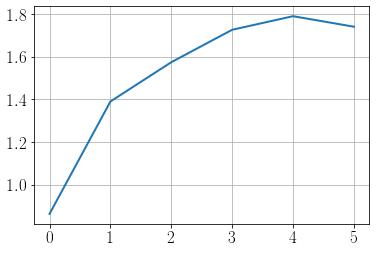

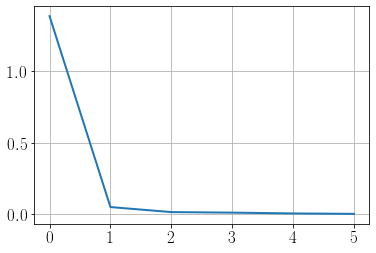

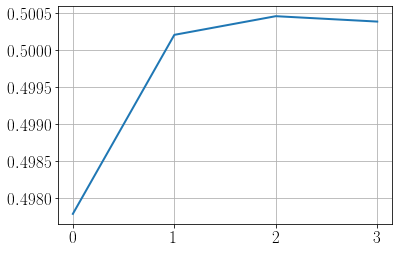

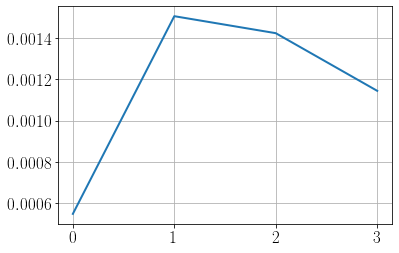

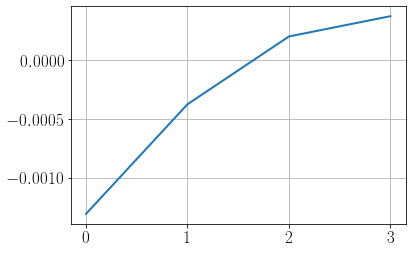

In [47]:
from tqdm import tqdm
from multiprocessing import Pool

out = 0
# no of momenta states outside cloud, on each side of FS

ins = 2
# no of momenta states inside cloud, on each side of FS

lastup = 0
# position of the last electron to get recoupled

imp_up = 0 
imp_down = 1

# positions of the innermost cloud electrons

U =  [0, 0, 0, 0, 0, 0, 0.02588095729063313, 0.05912454680743548, 0.08365083984444548, 0.1]
J =  [2.855354625767993, 0.36219509450733745, 0.14919555344849617, 0.09004266975607594, 0.06471443776979428, 0.051115748303351444, 0.04274444278658412, 0.037102979022693, 0.03305084745762712, 0.03]
K =  [0.022262653773417348, 0.01686020511451763, 0.014772103640345036, 0.013451885950169088, 0.012505998894282763, 0.011783353226002248, 0.011207813070288258, 0.01073551116534082, 0.010338983050847458, 0.01]
V =  [118.39027535266469, 3.3909558102845887, 1.0128755769536313, 0.5007258418588596, 0.3130871074107391, 0.22293440856183244, 0.17132027303879221, 0.1384533114489056, 0.11605639955450608, 0.1]
count =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
D =  [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]

'''
U =  [0, 0, 0, 0, 0, 0, 0.02588095729063313, 0.05912454680743548, 0.08365083984444548, 0.1]
J =  [2.855354625767993, 0.36219509450733745, 0.14919555344849617, 0.09004266975607594, 0.06471443776979428, 0.051115748303351444, 0.04274444278658412, 0.037102979022693, 0.03305084745762712, 0.03]
K =  [0.022262653773417348, 0.01686020511451763, 0.014772103640345036, 0.013451885950169088, 0.012505998894282763, 0.011783353226002248, 0.011207813070288258, 0.01073551116534082, 0.010338983050847458, 0.01]
V =  [118.39027535266469, 3.3909558102845887, 1.0128755769536313, 0.5007258418588596, 0.3130871074107391, 0.22293440856183244, 0.17132027303879221, 0.1384533114489056, 0.11605639955450608, 0.1]
count =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
D =  [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]
off_diag_5 = tensor([idt] * (2) + [create(2), idt, idt, create(2), destroy(2), idt, idt, destroy(2)] + [idt]*(2*out + 2*ins - 8))
'''

# U =  [0, 0, 0, 0, 0, 0.08863413956678395, 0.3575680281585913, 0.642418643505904, 0.8694729972263011, 1]
# J =  [1.1217354477843178, 0.2396246552823889, 0.1198844558431418, 0.07932840917048067, 0.05992173536151718, 0.04875294605271503, 0.04154850055228777, 0.03652945704191348, 0.03283464566929134, 0.03]
# K =  [1.1217354477843178, 0.2396246552823889, 0.1198844558431418, 0.07932840917048067, 0.05992173536151718, 0.04875294605271503, 0.04154850055228777, 0.03652945704191348, 0.03283464566929134, 0.03]
# V =  [10.668816108968706, 1.635862784927544, 0.6548178775410185, 0.37061031472770484, 0.24943477108338288, 0.18274227298211265, 0.13633103522908355, 0.09976259729680442, 0.07034005110594656, 0.05]
# count =  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# D =  [0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1]

# U =  [0, 0, 0, 0, 0, 0, 0.4335012857596981]
# J =  [41.65137072728905, 7.421985528256318, 3.0764876297977835, 1.7632993761561673, 1.1893810568831, 0.8818478505045518, 0.6946383568070326]
# K =  [0.11014854383139917, 0.10349303670420885, 0.09899373972501821, 0.09516847820969296, 0.09175302137185129, 0.08864547352971129, 0.08578996582056872]
# V =  [698.7912946938286, 56.013376355019446, 16.783149824539997, 7.729738695156247, 4.4289952117072, 2.887478398100373, 2.033462108444947]
# count =  [1, 2, 3, 4, 5, 6, 7]
# D =  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

# U =  [0, 0, 0, 2.903671720911781, 3.227607510088996, 3.011643496163671]
# J =  [41.65137072728905, 7.421985528256318, 3.0764876297977835, 1.7632993761561673, 1.1893810568831, 0.8818478505045518]
# K =  [0.11014854383139917, 0.10349303670420885, 0.09899373972501821, 0.09516847820969296, 0.09175302137185129, 0.08864547352971129]
# V =  [698.7912946938286, 56.013376355019446, 16.783149824539997, 7.729738695156247, 4.4289952117072, 2.887478398100373]
# count =  [1, 2, 3, 4, 5, 6]
# D =  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]


w = -0.1
j = J[0] * count[0]
k = K[0] * count[0]
v = V[0] * sqrt(count[0])
gamma = (3*j + k + 2*U[0])/(8*v)
csm = sqrt(sqrt(gamma**2 + 4) + gamma)
ccm = -sqrt(sqrt(gamma**2 + 4) - gamma)

corrs = []

out = 1
psi = tensor(get_cloud(csm, ccm, ins), basis(2,1), basis(2,1))
# corrs = [corr(psi)]
a = 1
b = 2
c = 0
d = 1
I1 = [mutI(psi, a, b)]
# I1 = []
# print (I1[-1])
# mutual information between two electrons inside the cloud, of same spin

I2 = [mutI(psi, c, d)]
# I2 = []
# print (I2[-1])
# mutual information between the innermost and outermost electron

# I3 = [mut_inf(psi, imp_up, cloud1up)]
# print ("I3:",I3[-1])
# mutual information between the innermost up and impurity up electrons
for i in range(5):
    # print (corrs[-1])
    print (i)
    args = (U[i+1], J[i+1], K[i+1], V[i+1], D[i+1], w)
    psi = rev_one_step(psi, out, ins, args).unit()
    out -= 1
    ins += 1
    if ins >= 3:
        I1.append(mutI(psi, a, b))
        I2.append(mutI(psi, c, d))
    if ins >= 4:
        corrs.append(corr(psi))
#         print (corrs[-1])
#     print ("I1:",I1[-1])
#     I2.append(mut_inf(psi, lastup, cloud1up))
#     print (I3[-1])
#     I3.append(mut_inf(psi, imp_up, cloud1up))
#     print ("I3:",I3[-1])
    out += 1
    psi = tensor(psi, basis(2, 1), basis(2, 1))
    
plt.plot(I1)
plt.show()
plt.plot(I2)
plt.show()
# print ("I1=", I1)
# print ("I2=", I2)
corrs = np.array(corrs)
for i in range(len(corrs[0])):
#     print ("corr_{}=".format(i),np.array(corrs)[:,i])
    plt.plot(np.array(corrs)[:,i])
    plt.show()
    
# print ("c1 = ", [c[0] for c in corrs])
# print ("c2 = ", [c[1] for c in corrs])
# print ("c3 = ", [c[2] for c in corrs])
# print ("c4 = ", [c[3] for c in corrs])
# I1 = mut_inf(psi, cloud1up, cloud2up)
# print (I1)
# print (I3)
# print (I3)

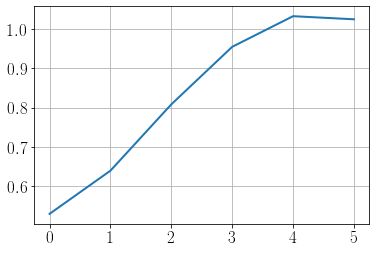

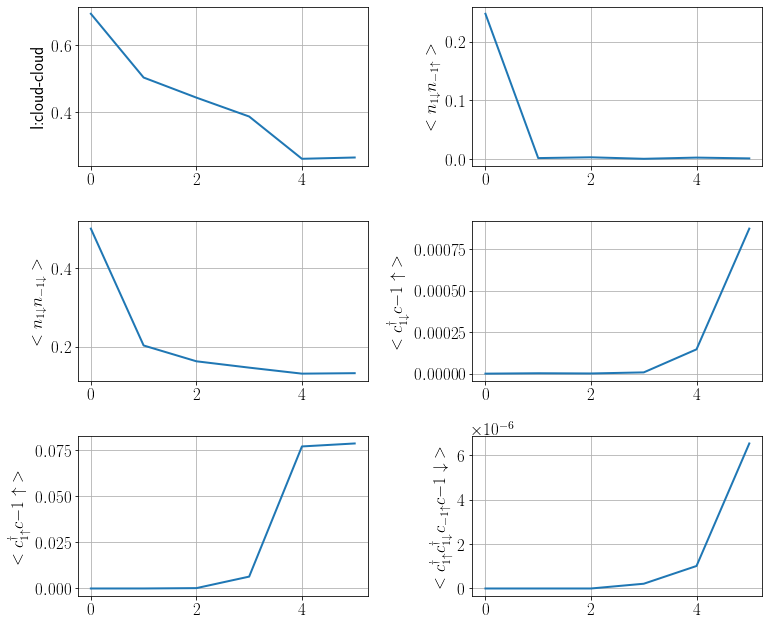

In [44]:
# !apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

plt.plot(I1)

I1 = [0.6931471805599453, 0.5027994750013625, 0.44287078352334314, 0.3864835472164138, 0.2602715743804396, 0.26413910332887736]

'''corrs = [
0.2472037332913408, 0.5, 0.0, 0.0]
0
[0.001838969723091228, 0.2033775756011223, -2.395501581717002e-06, 8.418052584954193e-06]
1
[0.0031849587068003785, 0.16324321724051036, -1.0674324405191036e-06, 0.00019846561793481634]
2
[0.0006373262042843603, 0.1471330701462955, 7.597450009337662e-06, 0.006446976306860242]
3
[0.0026778433681072557, 0.1318862466660754, 0.00014663777870428625, 0.07707810516699248]
4
[0.0013237558398355744, 0.13305295934205227, 0.0008753705255651228, 0.0786918237687373]]
]'''

# I3 = [0.6931471805599453, 0.1038192509827075, 0.004080831503544768, 0.02812412852145668, 0.07890958543772397, ]

# I1 = [round(element, 10) for element in I1]
# I2 = [round(element, 10) for element in I2]
# I3 = [round(element, 10) for element in I3]

c1 =  [0.2472037332913408, 0.001838969723091228, 0.0031849587068003785, 0.0006373262042843603, 0.0026778433681072557, 0.0013237558398355744]
c2 =  [0.5, 0.2033775756011223, 0.16324321724051036, 0.1471330701462955, 0.1318862466660754, 0.13305295934205227]
c3 =  [0.0, -2.395501581717002e-06, -1.0674324405191036e-06, 7.597450009337662e-06, 0.00014663777870428625, 0.0008753705255651228]
c4 =  [0.0, 8.418052584954193e-06, 0.00019846561793481634, 0.006446976306860242, 0.07707810516699248, 0.0786918237687373]
c5 = [0.0, 0.0, 1.8994337469080465e-10, 2.1383517007372293e-07, 1.011924450973683e-06, 6.520980617901891e-06]

fig, ax = plt.subplots(3,2)
fig.set_size_inches(11,9)
ax[0][0].plot(I1)
ax[0][0].set_ylabel(r"I:cloud-cloud")
ax[0][1].plot(np.abs(c1))
ax[0][1].set_ylabel(r"$<n_{1 \downarrow} n_ {-1 \uparrow}>$")
ax[1][0].plot(np.abs(c2))
ax[1][0].set_ylabel(r"$<n_{1 \downarrow} n_ {-1 \downarrow}>$")
ax[1][1].plot(np.abs(c3))
ax[1][1].set_ylabel(r"$<c^\dagger_{1 \downarrow} c{-1 \uparrow}>$")
ax[2][0].plot(np.abs(c4))
ax[2][0].set_ylabel(r"$<c^\dagger_{1 \uparrow} c{-1 \uparrow}>$")
ax[2][1].plot(np.abs(c5))
ax[2][1].set_ylabel(r"$<c^\dagger_{1 \uparrow} c^\dagger_{1 \downarrow} c_{-1 \uparrow} c{-1 \downarrow}>$")
plt.tight_layout()
plt.show()
# plt.plot(I2)
# # plt.yscale("log")
# plt.xlabel(r"RG step")
# plt.ylabel(r"$I({}:{})$".format(lastup, cloud1up))
# plt.show()
# plt.plot(I3)
# # plt.yscale("log")
# plt.xlabel(r"RG step")
# plt.ylabel(r"$I({}:{})$".format(imp_up, cloud1up))
# plt.show()